In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
import numpy as np

df = pd.read_csv('cleaned_data_mil.csv',index_col=0)
df.head(5)
# listing genres
genres = df['genre'].unique()
print(genres)

['acoustic' 'afrobeat' 'alt-rock' 'ambient' 'black-metal' 'blues'
 'breakbeat' 'cantopop' 'chicago-house' 'chill' 'classical' 'club'
 'comedy' 'country' 'dance' 'dancehall' 'death-metal' 'deep-house'
 'detroit-techno' 'disco' 'drum-and-bass' 'dub' 'dubstep' 'edm' 'electro'
 'electronic' 'emo' 'folk' 'forro' 'french' 'funk' 'garage' 'german'
 'gospel' 'goth' 'grindcore' 'groove' 'guitar' 'hard-rock' 'hardcore'
 'hardstyle' 'heavy-metal' 'hip-hop' 'house' 'indian' 'indie-pop'
 'industrial' 'jazz' 'k-pop' 'metal' 'metalcore' 'minimal-techno'
 'new-age' 'opera' 'party' 'piano' 'pop' 'pop-film' 'power-pop'
 'progressive-house' 'psych-rock' 'punk' 'punk-rock' 'rock' 'rock-n-roll'
 'romance' 'sad' 'salsa' 'samba' 'sertanejo' 'show-tunes'
 'singer-songwriter' 'ska' 'sleep' 'songwriter' 'soul' 'spanish' 'swedish'
 'tango' 'techno' 'trance' 'trip-hop']


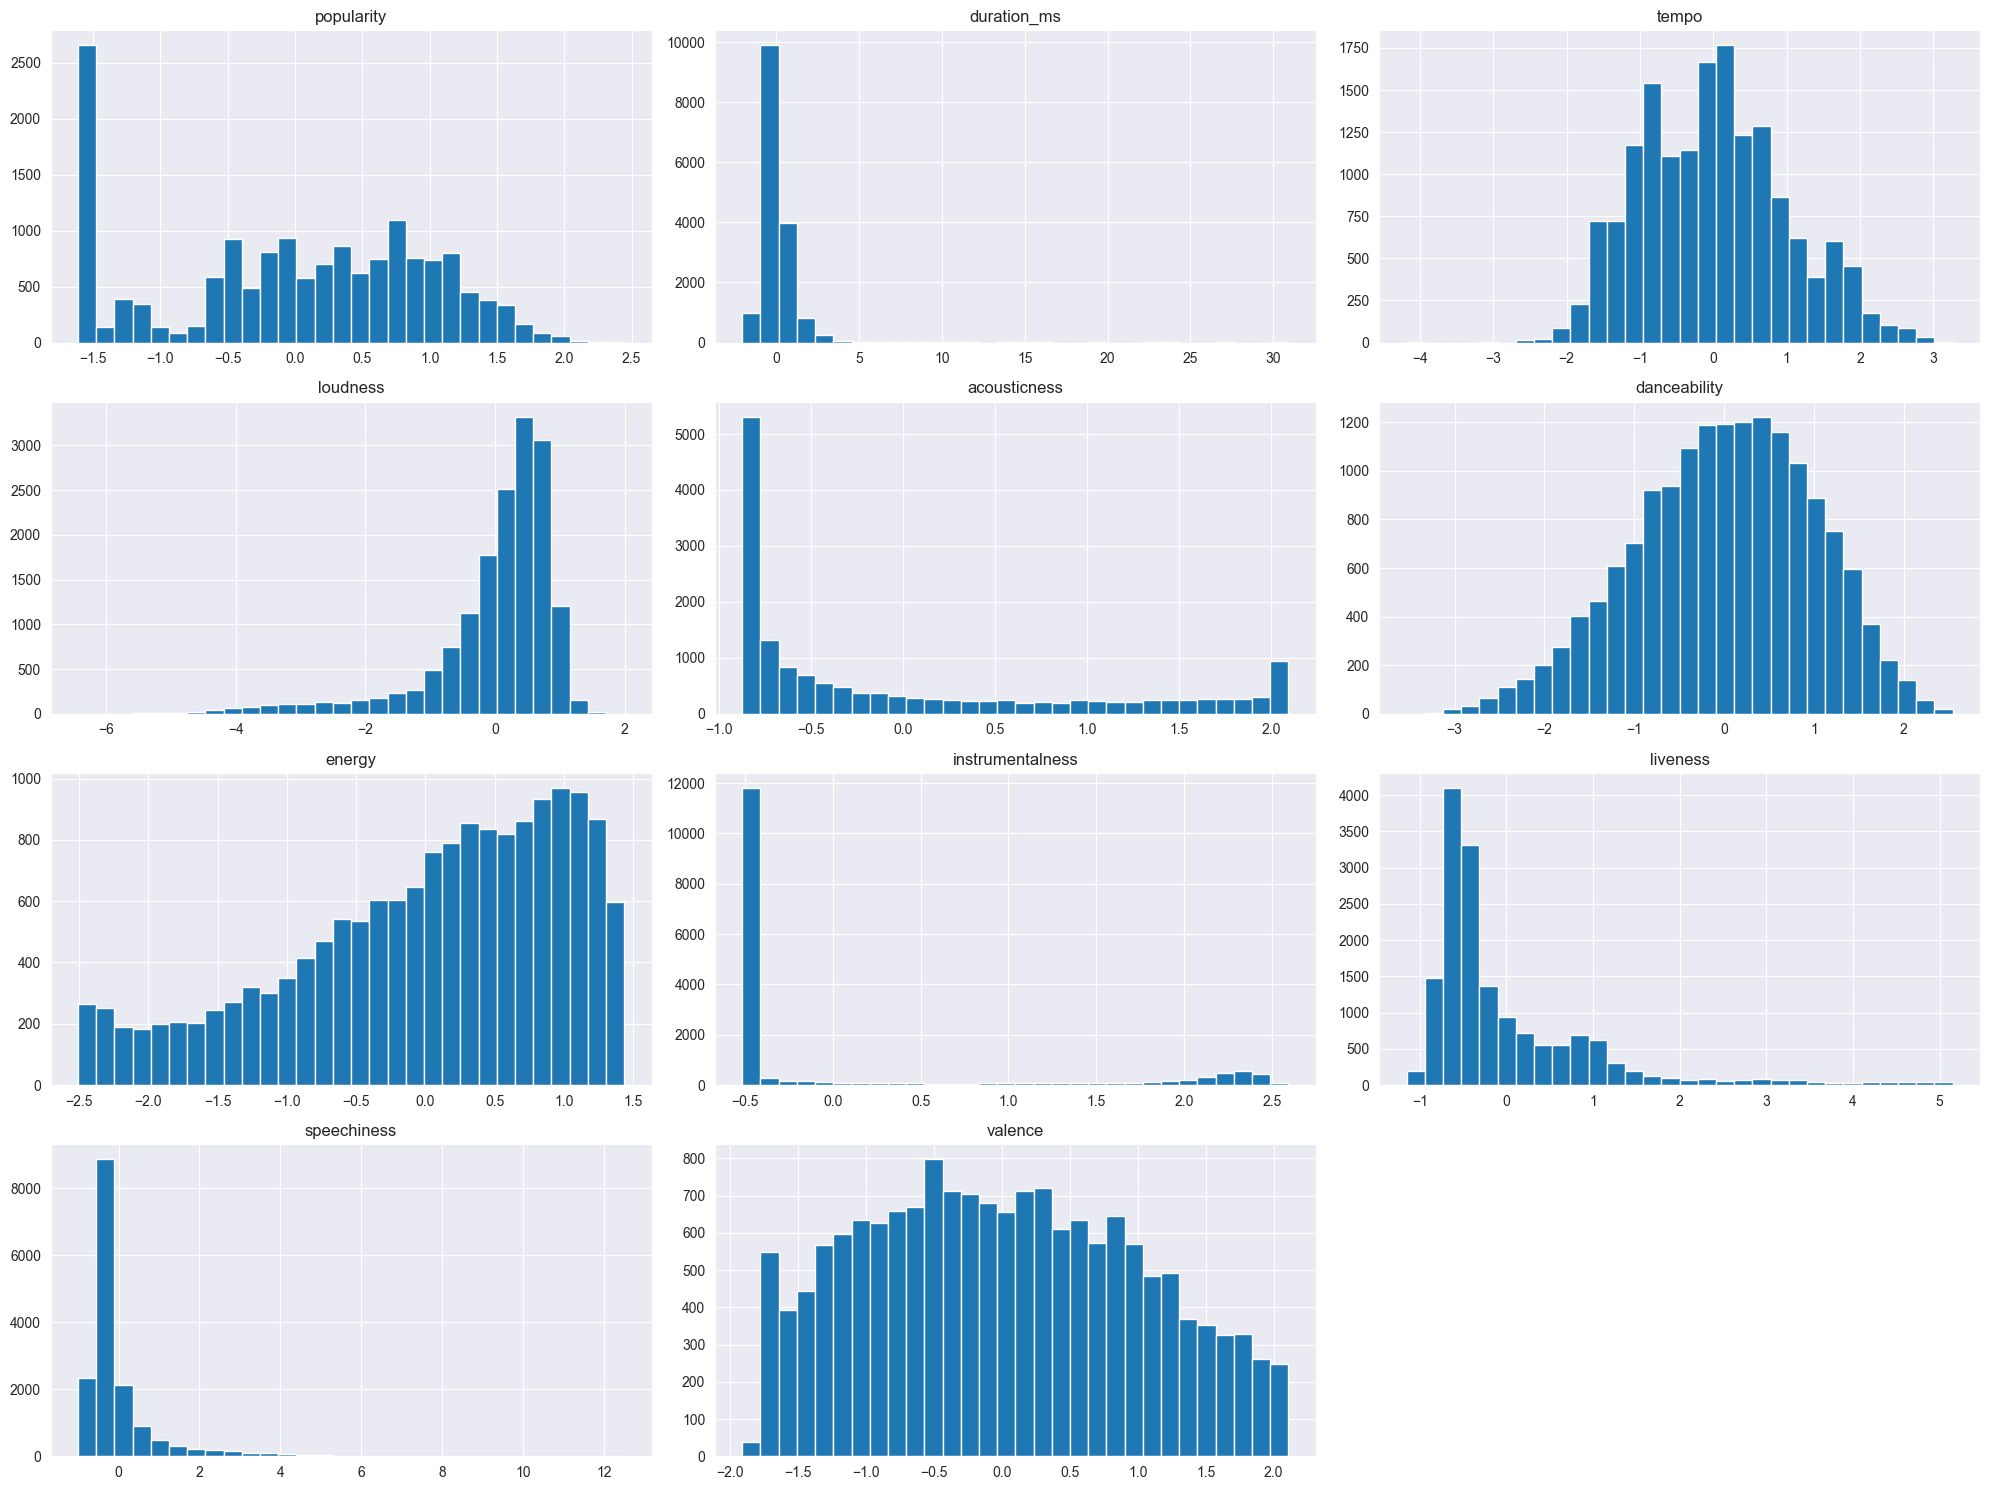

In [2]:

features_to_plot = ['popularity', 'duration_ms', 'tempo', 'loudness', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']

# Normalize selected attributes using z-score normalization
scaler = StandardScaler()
df[features_to_plot] = scaler.fit_transform(df[features_to_plot])

sns.set_style('darkgrid')
df[features_to_plot].hist(figsize = (20,15), bins = 30)
plt.tight_layout()
plt.show()

- danceability and tempo have nearly normal distributions
- loudness, acousticness, speechiness, liveliness are skewed, with loudness being left-skewed and the rest being right-skewed
- for popularity, if the songs with the value 0 are taken out, the distribution would almost be normal
- energy has an increasing distribution

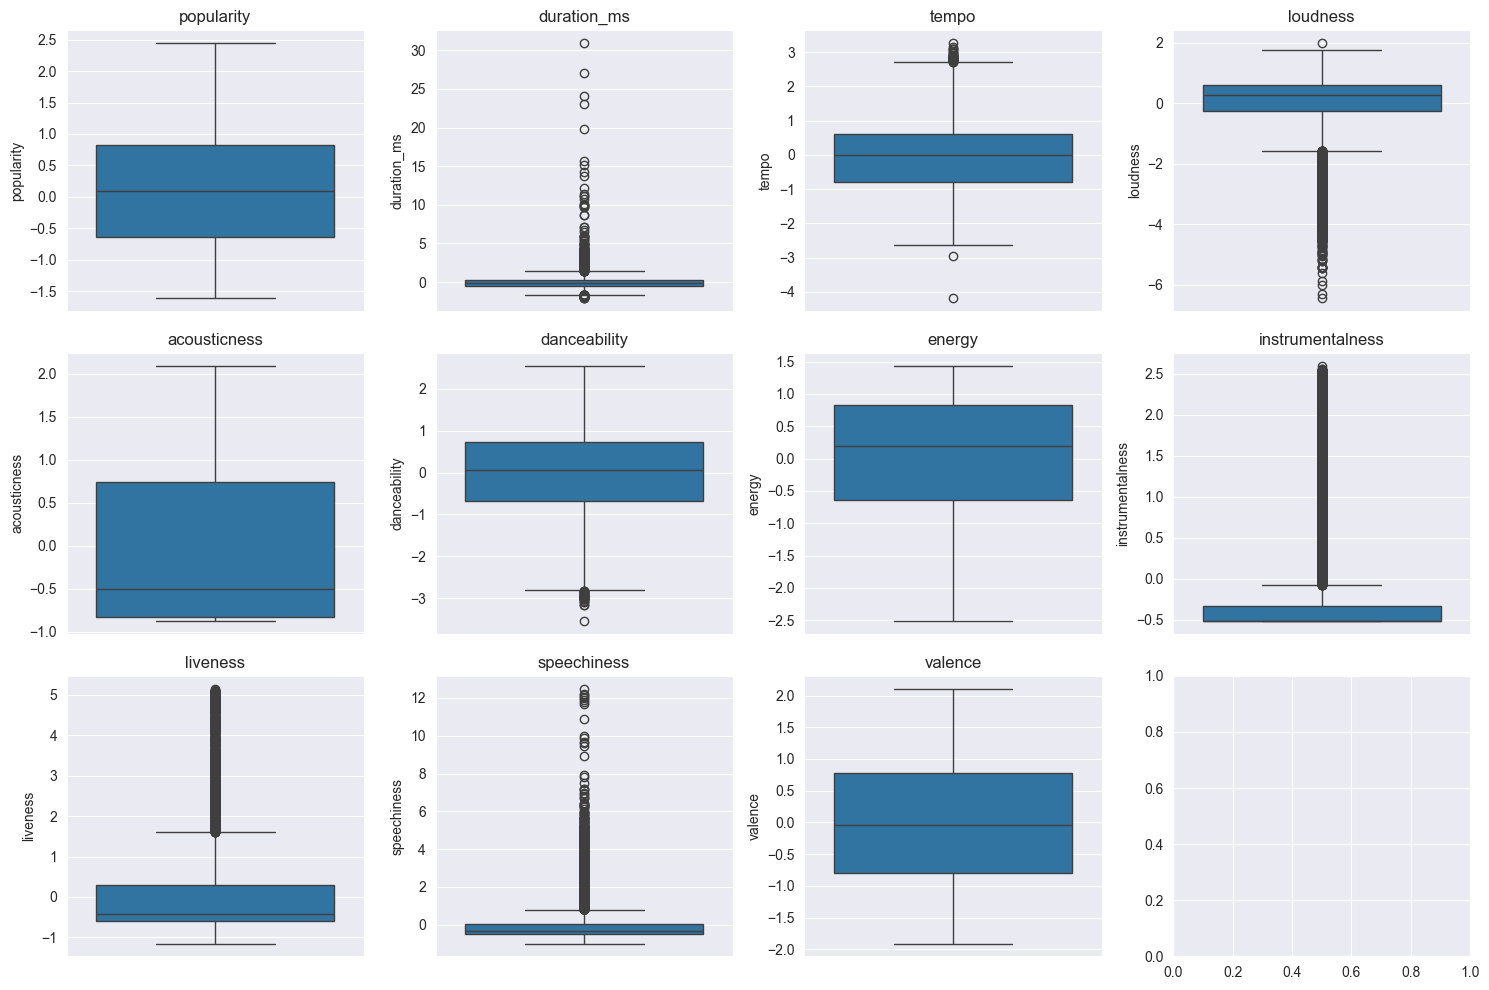

In [3]:
# boxplot for numerical columns
features_to_plot = ['popularity', 'duration_ms', 'tempo', 'loudness', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']
fig, axes = plt.subplots(nrows = 3, ncols = 4, figsize = (15, 10))
for i, col in enumerate(features_to_plot):
    sns.boxplot(y=col, data=df, ax=axes[i//4, i%4])
    axes[i//4, i%4].set_title(col)
plt.tight_layout()
plt.show()

- acousticness, energy and valence have no outliers
- all of the other features have many outliers which makes sense since they are features that describe a song and are thus useful and should be kept to keep the diversity of the songs in the dataset 

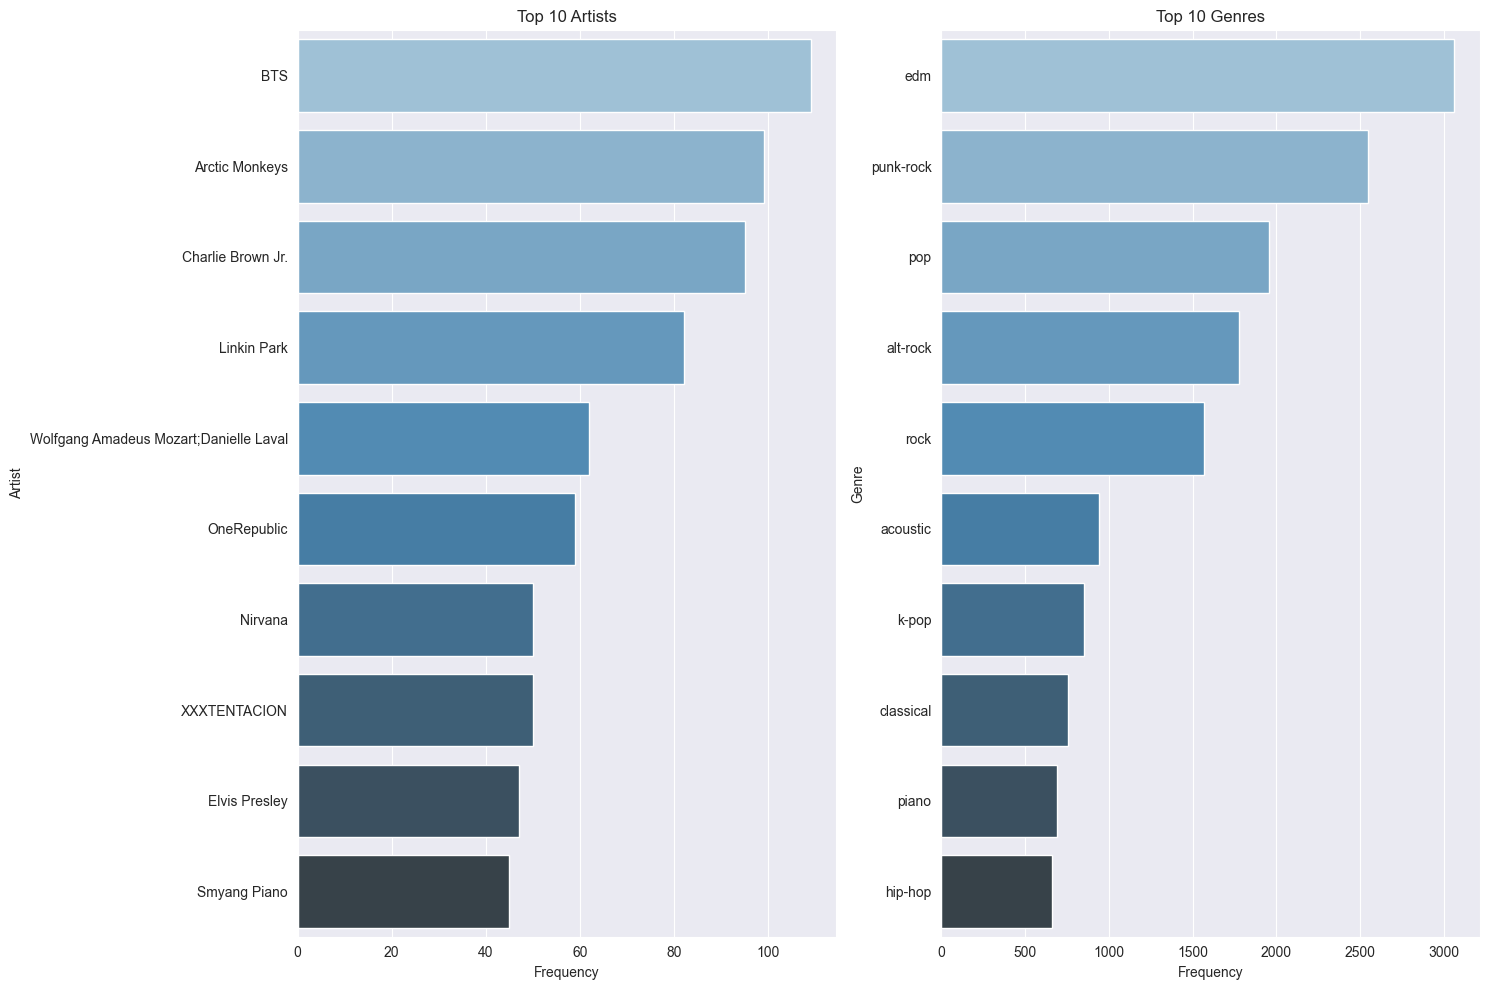

In [4]:
top = 10
# Get the top N most frequent artists, albums, tracks, and genres
top_artists = df['artists'].value_counts().head(top)
top_genres = df['track_genre'].value_counts().head(top)

# Plotting
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 10))

# Top N Artists
sns.barplot(x = top_artists.values, y = top_artists.index, hue = top_artists.index, palette="Blues_d", ax=axes[0], legend = False)
axes[0].set_title(f'Top 10 Artists')
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Artist')

# Top N Genres
sns.barplot(x = top_genres.values, y = top_genres.index, hue = top_genres.index, palette = "Blues_d", ax = axes[1], legend = False)
axes[1].set_title(f'Top 10 Genres')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Genre')

plt.tight_layout()
plt.show()



- most of the artists in the top 10 are known around the world such as George Jones, The Beatles, Hank Williams, BTS, and Arctic Monkeys
- the top 10 genres are slightly surprising since only a few are considered mainstream popular genres
    - study songs in this dataset consist of lo-fi songs 
    - comedy songs in this dataset consist of songs that are not meant to be taken seriously or be known for their musicality
    - black-metal, heavy-metal and grindcore are all subgenres or related to metal music
    - forro is a genre of dance music from northeastern Brazil
    - Malay and Iranian are all music from specific countries
    - IDM is a subgenre of EDM
    - bluegrass is a genre that is derived from country, blues and jazz

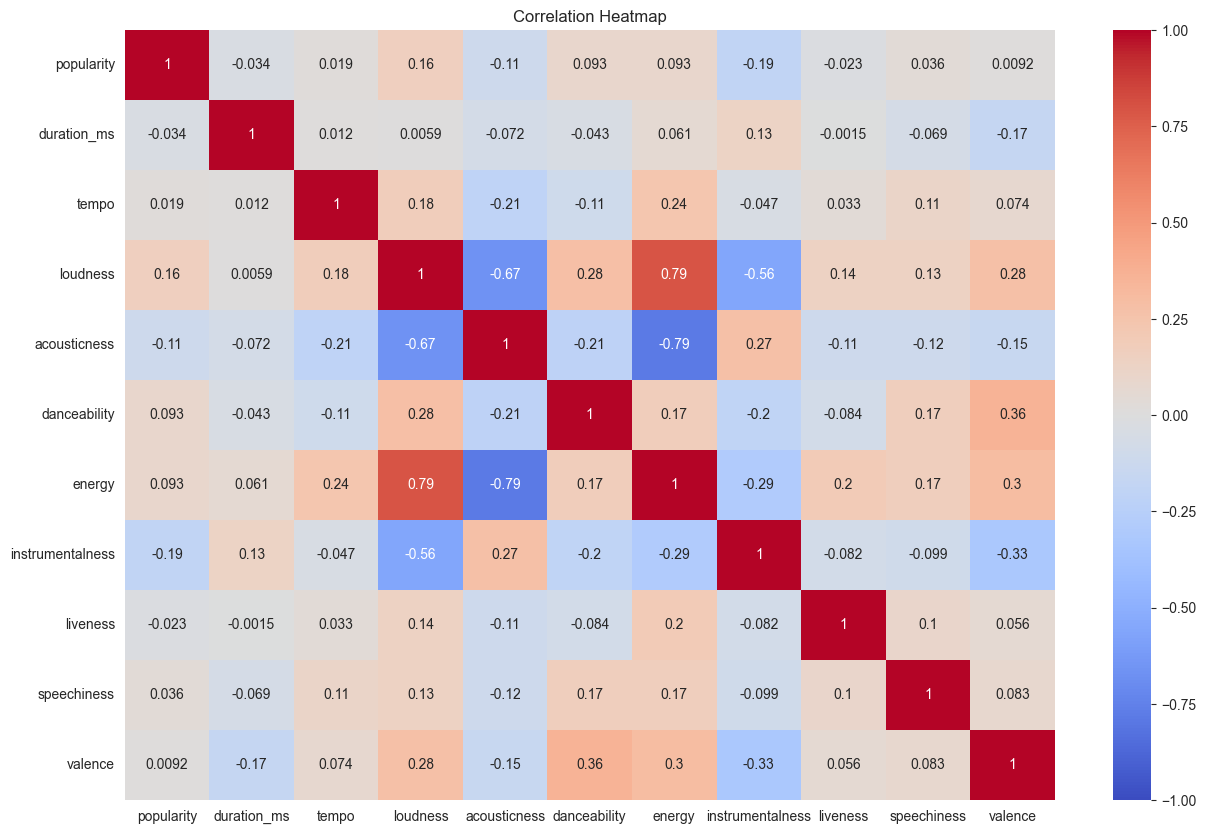

In [5]:
# heatmap for correlation
corr = df[features_to_plot].corr()
plt.figure(figsize = (15, 10))
sns.heatmap(corr, annot = True, vmin = -1, vmax = 1, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

- there is a significant positive correlation between energy and loudness
- there are significant negative correlations between acousticness and loudness, and energy and acousticness
- there is a slight positive correlation between valence and danceability
- there is a slight negative correlation between isntrumentalness and loudness